# Analysis of  StarTracker Pointing - Repeatability 

Full test description at: https://sitcomtn-065.lsst.io/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Load Data

Insert here the observation information. 

In [37]:
# Observation Deck
# name of the json file should be: 'startracker_YYYY-MM-DD.json'
# 'YYYY-MM-DD': [[seq_number_0, seq_number_1],[seq_number_2, seq_number_3]]

obsDeck = {'2023-03-09':[ [600,646],  [646,946],  [949,982], [983,1115]],
           '2023-03-17':[ [292,858] ],
           '2023-03-22':[[569, 1229]]
          }

### Process the Data

- The groups are images that share the same target RA,DEC. The function `get_groups` finds them by selecting the images with less than 30 arcec appart.

- The snakes are the full set of exposures of a circle of 3.5 deg radius. The function `get_snakes` groups the circles with a point difference than 7deg. I choose this large offset because I use an eucledi

In [38]:
from helper import read_rubintv, get_groups, get_snakes, filter_sequences, filter_groups

def process_data(date, sequences):
    # read data
    df = read_rubintv(date)
    
    # select sequences
    data = filter_sequences(df, sequences)
    
    # group the three images taken in a row
    data = get_groups(data)
    
    # select only groups w/ 3 or 4 images
    data, ngroups = filter_groups(data)
    
    # get snakes
    data = get_snakes(data)
    
    nsnakes = np.unique(data['snakes']).size
    print('Number of Snakes: %i'%nsnakes)
    
    return data

In [39]:
datas = dict().fromkeys(obsDeck.keys())
for date, seq in zip(obsDeck.keys(), obsDeck.values()):
    print('Processing Data: %s'%date)
    print('sequences: %i-%i'%(np.min(seq),np.max(seq)))
    data = process_data(date, seq)
    datas[date] = data
    print()

Processing Data: 2023-03-09
sequences: 600-1115
Number of Groups: 162
Number of Snakes: 14

Processing Data: 2023-03-17
sequences: 292-858
Number of Groups: 183
Number of Snakes: 17

Processing Data: 2023-03-22
sequences: 569-1229
Number of Groups: 132
Number of Snakes: 11



In [52]:
datas['2023-03-22'].describe()

,Exposure Time,MJD,Ra,Dec,Alt,Az,Exposure Time wide,MJD wide,Ra wide,Dec wide,...,Delta Ra Arcsec,Delta Dec Arcsec,Delta Alt Arcsec,Delta Az Arcsec,Delta Rot Arcsec,RMS scatter arcsec,RMS scatter pixels,seq_num,groups,snakes
count,623.0,623.000000,623.000000,623.000000,623.000000,623.000000,623.0,623.000000,623.000000,623.000000,...,623.000000,623.000000,623.000000,623.000000,6.230000e+02,623.000000,623.000000,623.000000,623.000000,623.000000
mean,4.0,60026.337888,266.944961,-23.739231,50.857723,88.681053,5.0,60026.337894,266.944965,-23.739230,...,-39.891946,-22.126299,51.609432,17.931591,1.016983e+06,0.928593,0.644587,899.423756,65.696629,4.565008
std,0.0,0.030990,18.388565,26.305349,17.264085,47.380954,0.0,0.030990,18.388567,26.305350,...,35.798909,22.184123,33.951148,12.174083,2.177379e+05,0.316590,0.219745,191.267015,38.251235,3.337673
min,4.0,60026.285039,237.129364,-55.596155,22.644257,21.115829,5.0,60026.285045,237.129297,-55.596152,...,-140.279233,-82.545753,1.636335,2.477761,2.327799e+04,0.282300,0.195907,569.000000,0.000000,0.000000
25%,4.0,60026.310199,251.796097,-49.705424,35.727005,42.746724,5.0,60026.310204,251.796121,-49.705424,...,-59.644582,-37.164346,25.161743,9.752929,9.392562e+05,0.741383,0.514599,730.500000,32.000000,1.000000
50%,4.0,60026.339807,266.664562,-20.680267,49.885480,51.434002,5.0,60026.339812,266.664508,-20.680267,...,-27.246816,-17.690705,45.216342,13.710901,9.545360e+05,0.897669,0.623079,905.000000,67.000000,5.000000
75%,4.0,60026.364233,284.556966,-0.579789,65.617708,135.295905,5.0,60026.364238,284.556943,-0.579788,...,-12.113550,-3.691955,75.425028,22.459437,1.161470e+06,1.079782,0.749614,1060.500000,98.000000,7.000000
max,4.0,60026.390414,302.247150,22.146066,79.154909,152.773915,5.0,60026.390420,302.247148,22.146111,...,3.567135,4.531515,132.320011,51.361492,1.295969e+06,2.538260,1.761865,1228.000000,131.000000,10.000000


### Check The Snakes

In [40]:
### check snakes
def plot_check_snakes(data, date):
    plt.figure()
    data['Calculated Ra wide'].plot(color='lightgray')
    plt.scatter(data['seq_num'] ,data['Calculated Ra wide'], 
               c=data['snakes'], cmap='tab20_r')
    #plt.scatter(data['Ra'],data['Dec'], c=data['snakes'], cmap='tab20c_r')

    plt.title('Settles - Snakes - %s'%date, fontsize=16)
    plt.xlabel('Ra', fontsize=16)
    #plt.ylabel('Dec', fontsize=16)
    plt.xlabel('Seq Number', fontsize=16)
    plt.savefig('figures/check_snakes_ra_%s.png'%date,dpi=100)

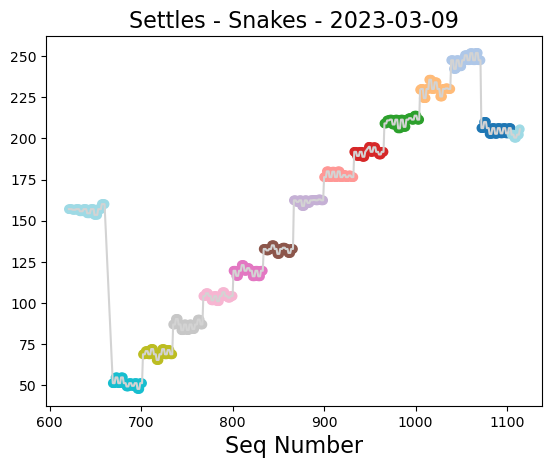

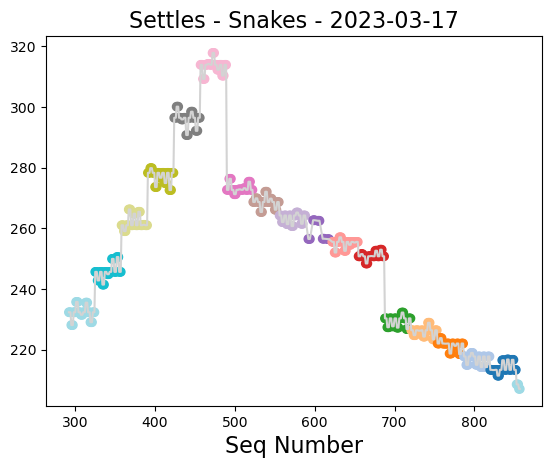

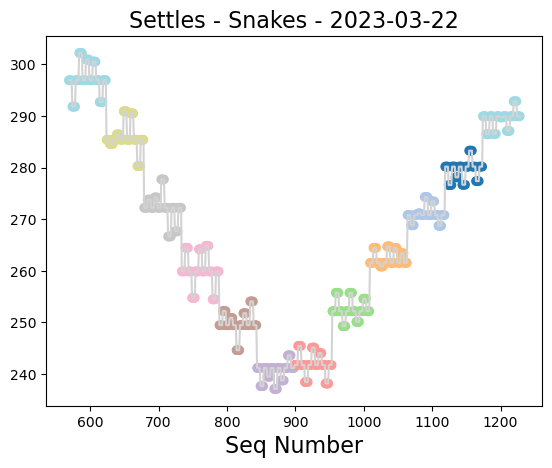

In [41]:
for date, data in zip(datas.keys(), datas.values()):
    plot_check_snakes(data, date)

## Residual Without Drift

The residual is the calculated coordinate subtracted by the mean of three images in a row. In the code language, I do the mean over each group of images.

In [42]:
def get_residual(ycol, df, keys):
    yvec = df[ycol].to_numpy()
    res = np.zeros_like(yvec)
    for ix in keys:
        res[ix] = (yvec[ix]-np.mean(yvec[ix]))*3600
    return res

def get_baseline(ycol, df, keys):
    yvec = df[ycol].to_numpy()
    base = np.zeros_like(yvec)
    for ix in keys:
        base[ix] = np.mean(yvec[ix])
    return base

def generate_data_wo_drift(data, date):
    # compute residuals over three images
    snakes = data['groups'].to_numpy()
    keys = [np.where(snakes==gi)[0] for gi in np.unique(snakes)]

    # radec quantities
    res_ra = get_residual('Calculated Ra wide', data, keys)
    res_dec = get_residual('Calculated Dec wide', data, keys)
    
    base_ra = get_baseline('Calculated Ra wide', data, keys)
    base_dec = get_baseline('Calculated Dec wide', data, keys)
    
    # az/alt quantities
    res_az = get_residual('Calculated Az wide', data, keys)
    res_alt = get_residual('Calculated Alt wide', data, keys)
    
    base_az = get_baseline('Calculated Az wide', data, keys)
    base_alt = get_baseline('Calculated Alt wide', data, keys)
    
    # put in a dataframe
    myvars = res_ra, res_dec, res_az, res_alt, base_ra, base_dec, base_az, base_alt, snakes
    cols = ['Res ra', 'Res dec', 'Res az', 'Res alt','Base Ra', 'Base Dec', 'Base Az', 'Base Alt', 'Snakes']
    mydict = dict().fromkeys(cols)
    for i,col in enumerate(cols):
        mydict[col] = myvars[i]
    
    # save output
    out = pd.DataFrame(mydict)
    out.to_csv('tmp/repeatability_wo_drift_%s.csv'%date)
    print('File saved: %s'%('tmp/repeatability_wo_drift_%s.csv'%date))

In [43]:
for date, data in zip(datas.keys(), datas.values()):
    generate_data_wo_drift(data, date)

File saved: tmp/repeatability_wo_drift_2023-03-09.csv
File saved: tmp/repeatability_wo_drift_2023-03-17.csv
File saved: tmp/repeatability_wo_drift_2023-03-22.csv


## Residual With Drift

The residual is computed by subtracting the first exposure of the circle. In the code language, I group by the snakes, then I subtract the first element of the sequence.

In [44]:
# from helper import get_residual_2, get_baseline_2
def get_residual_2(ycol, df, keys):
    yvec = df[ycol].to_numpy()
    res = np.zeros_like(yvec)
    for ix in keys:
        res[ix] = (yvec[ix]-yvec[ix][0])*3600
    return res

def get_baseline_2(ycol, df, keys):
    yvec = df[ycol].to_numpy()
    base = np.zeros_like(yvec)
    for ix in keys:
        base[ix] = yvec[ix][0]
    return base

def generate_data_w_drift(data, date):
    # compute residuals over three images
    snakes = data['snakes'].to_numpy()
    keys = [np.where(snakes==gi)[0] for gi in np.unique(snakes)]

    # radec quantities
    res_ra = get_residual_2('Calculated Ra wide', data, keys)
    res_dec = get_residual_2('Calculated Dec wide', data, keys)
    
    base_ra = get_baseline_2('Calculated Ra wide', data, keys)
    base_dec = get_baseline_2('Calculated Dec wide', data, keys)
    
    # az/alt quantities
    res_az = get_residual_2('Calculated Az wide', data, keys)
    res_alt = get_residual_2('Calculated Alt wide', data, keys)
    
    base_az = get_baseline_2('Calculated Az wide', data, keys)
    base_alt = get_baseline_2('Calculated Alt wide', data, keys)
    
    # get time
    base_utc = get_baseline_2('UTC', data, keys)
    utc = data['UTC']
    dT = (utc - base_utc).to_numpy().astype('timedelta64[s]').astype(np.int32)

    # put in a dataframe
    myvars = dT, res_ra, res_dec, res_az, res_alt, base_ra, base_dec, base_az, base_alt, snakes, utc
    cols = ['dT', 'Res ra', 'Res dec', 'Res az', 'Res alt','Base Ra', 'Base Dec', 'Base Az', 'Base Alt', 'Snakes', 'UTC']
    mydict = dict().fromkeys(cols)
    for i,col in enumerate(cols):
        mydict[col] = myvars[i]
    
    # save output
    out = pd.DataFrame(mydict)
    out.to_csv('tmp/repeatability_w_drift_%s.csv'%date)
    print('File saved: %s'%('tmp/repeatability_w_drift_%s.csv'%date))

In [45]:
for date, data in zip(datas.keys(), datas.values()):
    generate_data_w_drift(data, date)

File saved: tmp/repeatability_w_drift_2023-03-09.csv
File saved: tmp/repeatability_w_drift_2023-03-17.csv
File saved: tmp/repeatability_w_drift_2023-03-22.csv
